# YouTube Recommendation System's Evolutionary Dynamics (view count)

## Imports

In [1]:
from recommendation_systems_evolutionary_dynamics import EGT, OUTPUT_PATH
import posixpath
import numpy as np
import matplotlib.pylab as plt

## Initialize Game
1. Strategies counts for each populations (imiplicitly defining populations sizes)
2. actions names
3. players names
4. payoff matrix

br: 0.0 | (cl, ch): (0.0, 0.0) | (ul, uh): (0.0, 0.0)


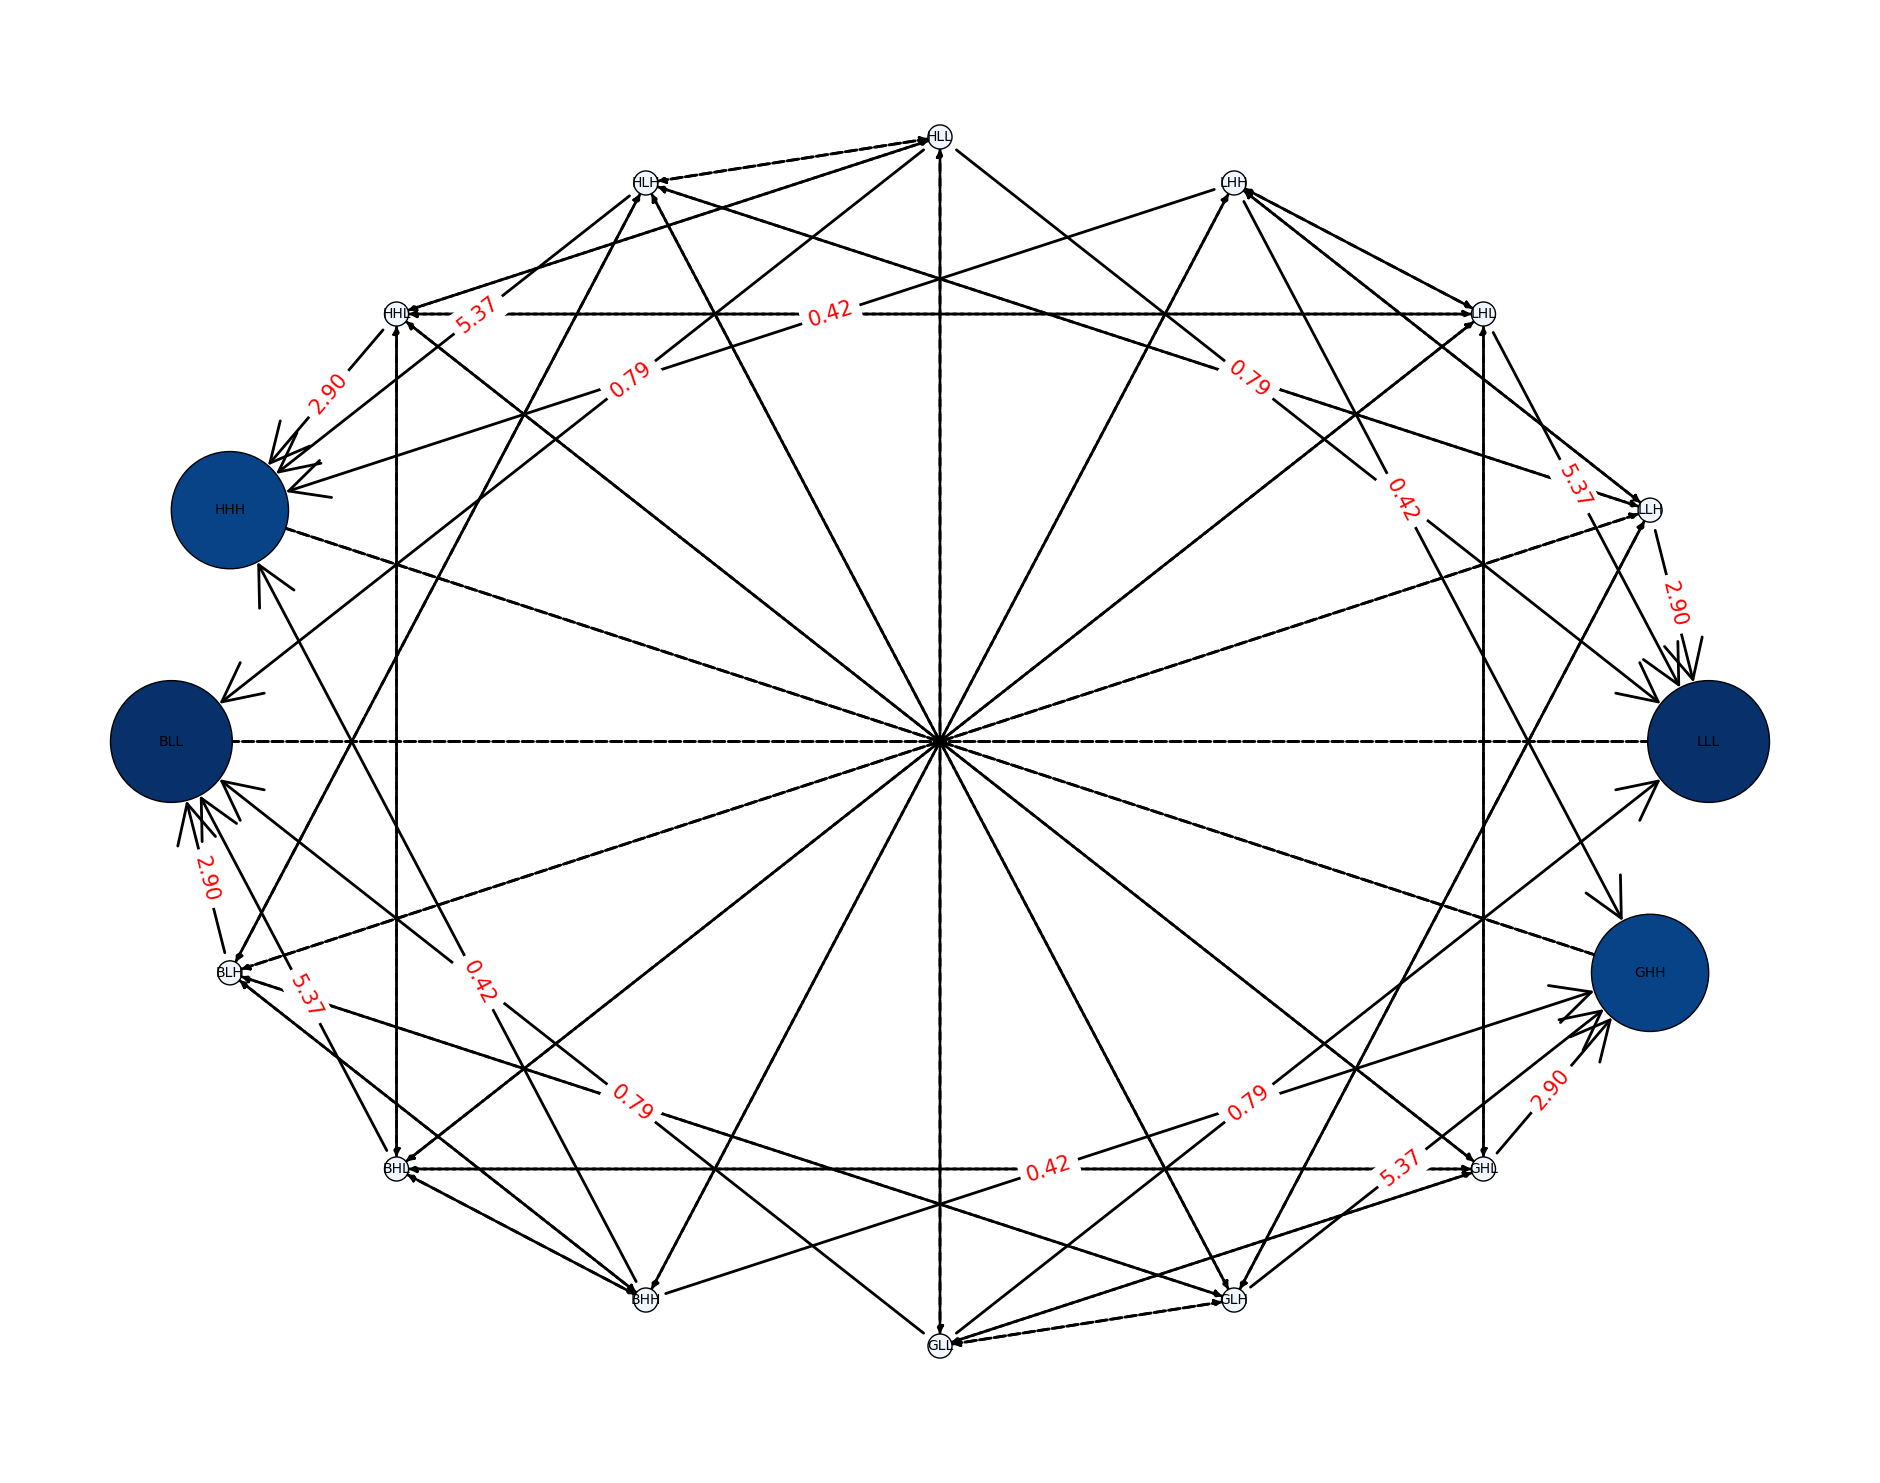

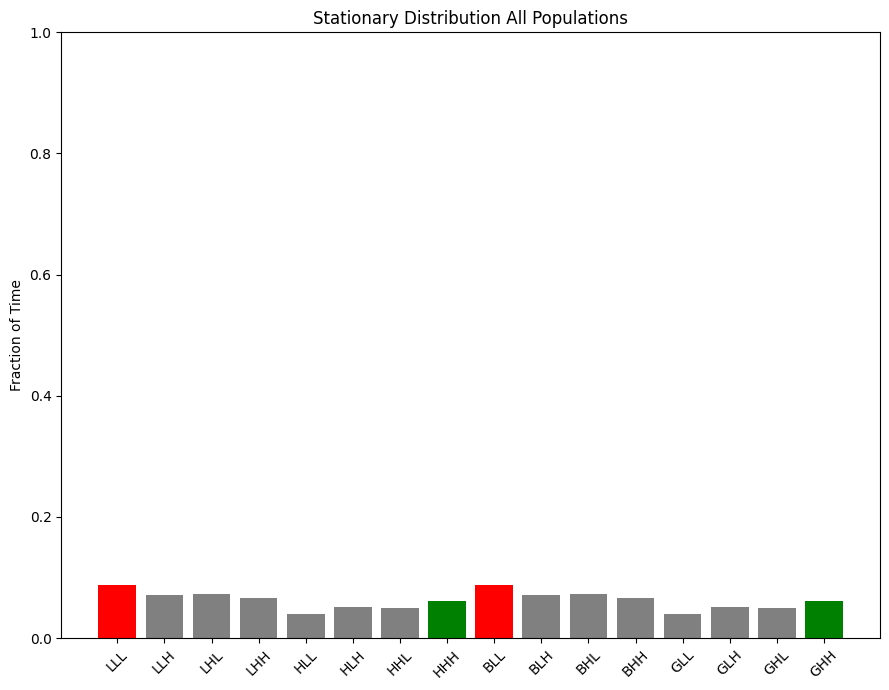

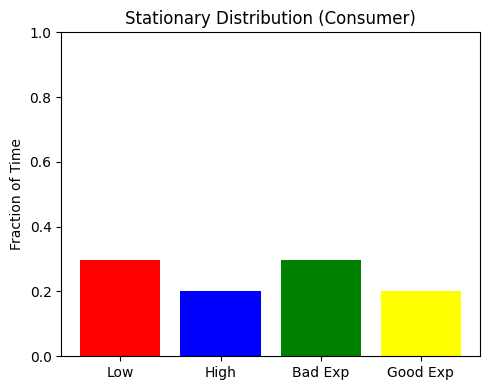

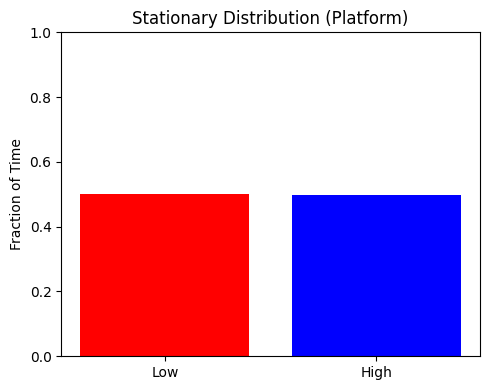

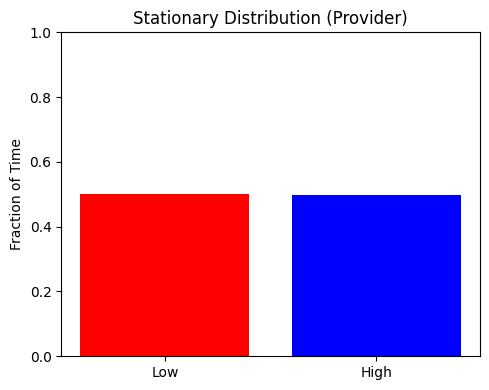

br: 0.0 | (cl, ch): (0.05, 0.15) | (ul, uh): (0.0, 0.0)


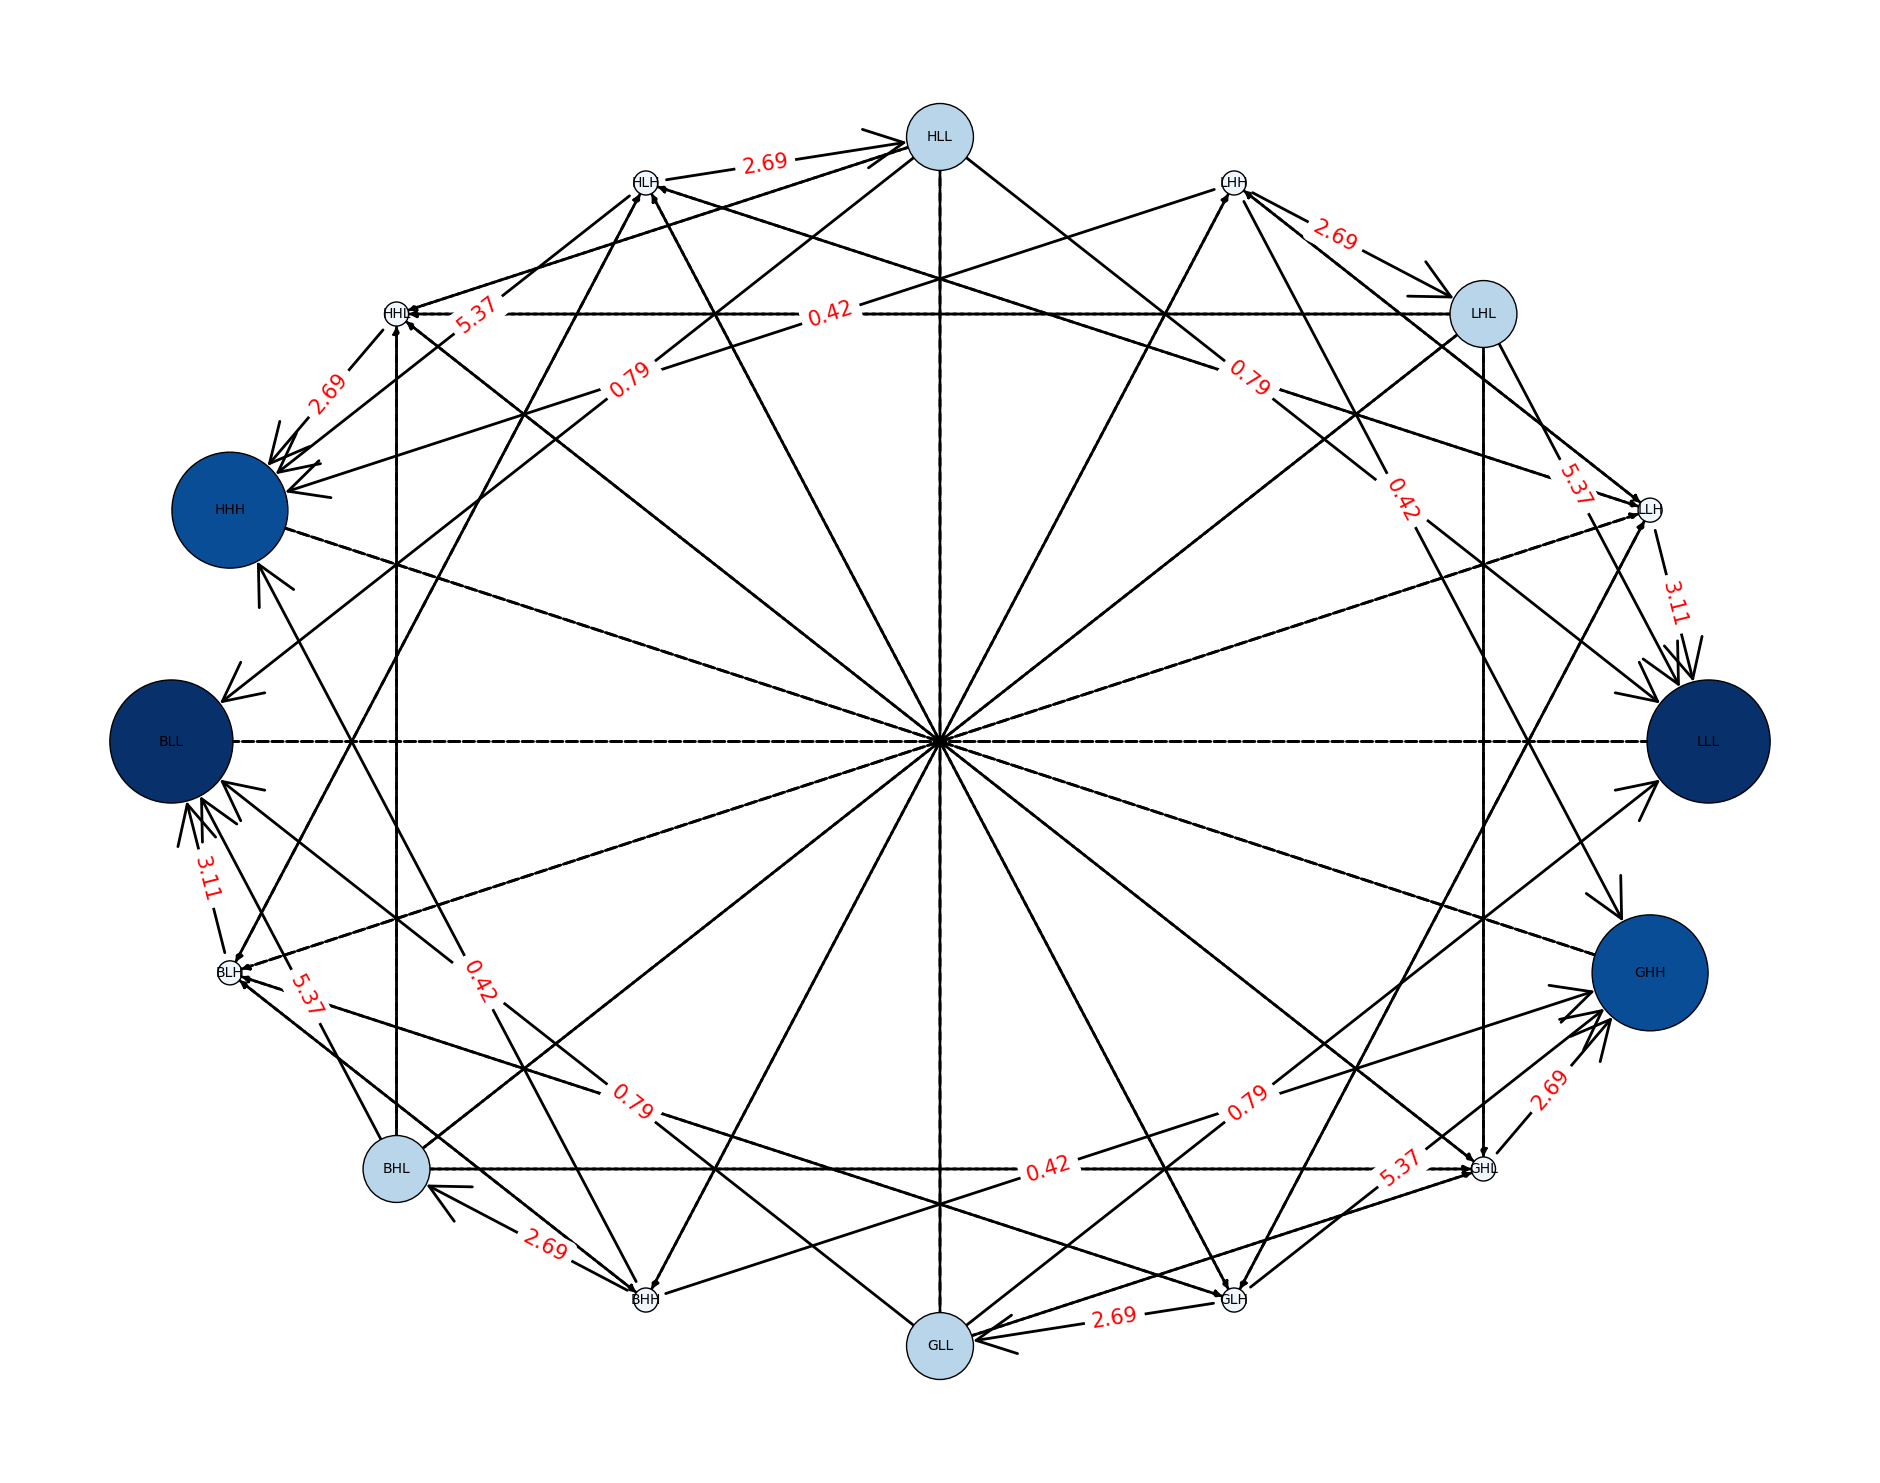

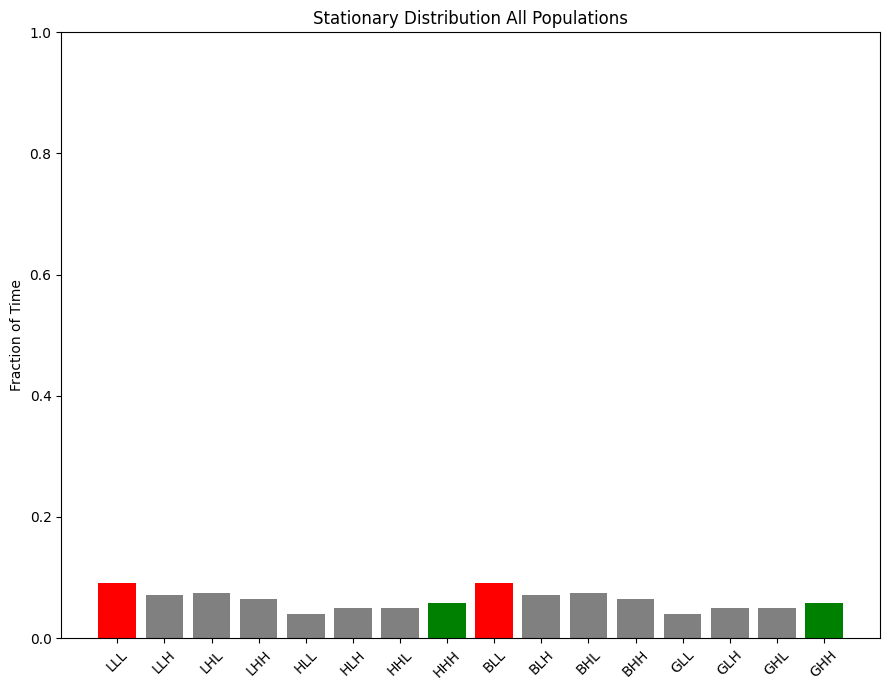

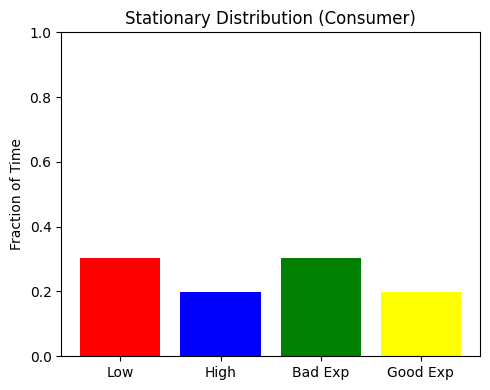

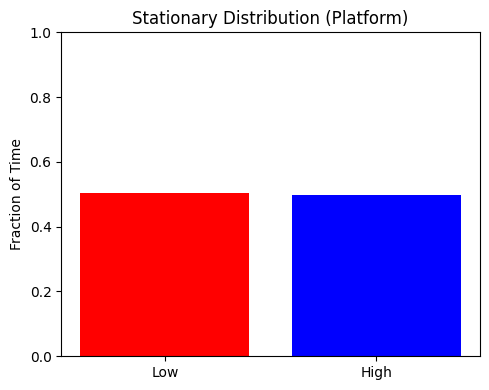

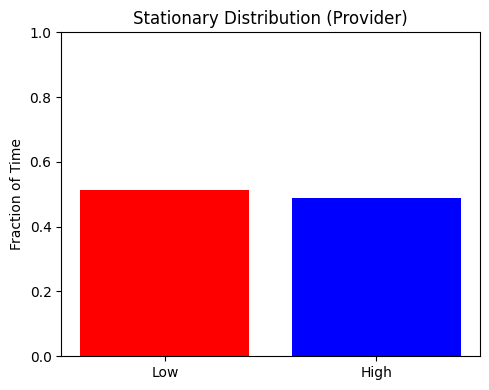

br: 0.0 | (cl, ch): (0.05, 0.15) | (ul, uh): (0.2, 0.4)


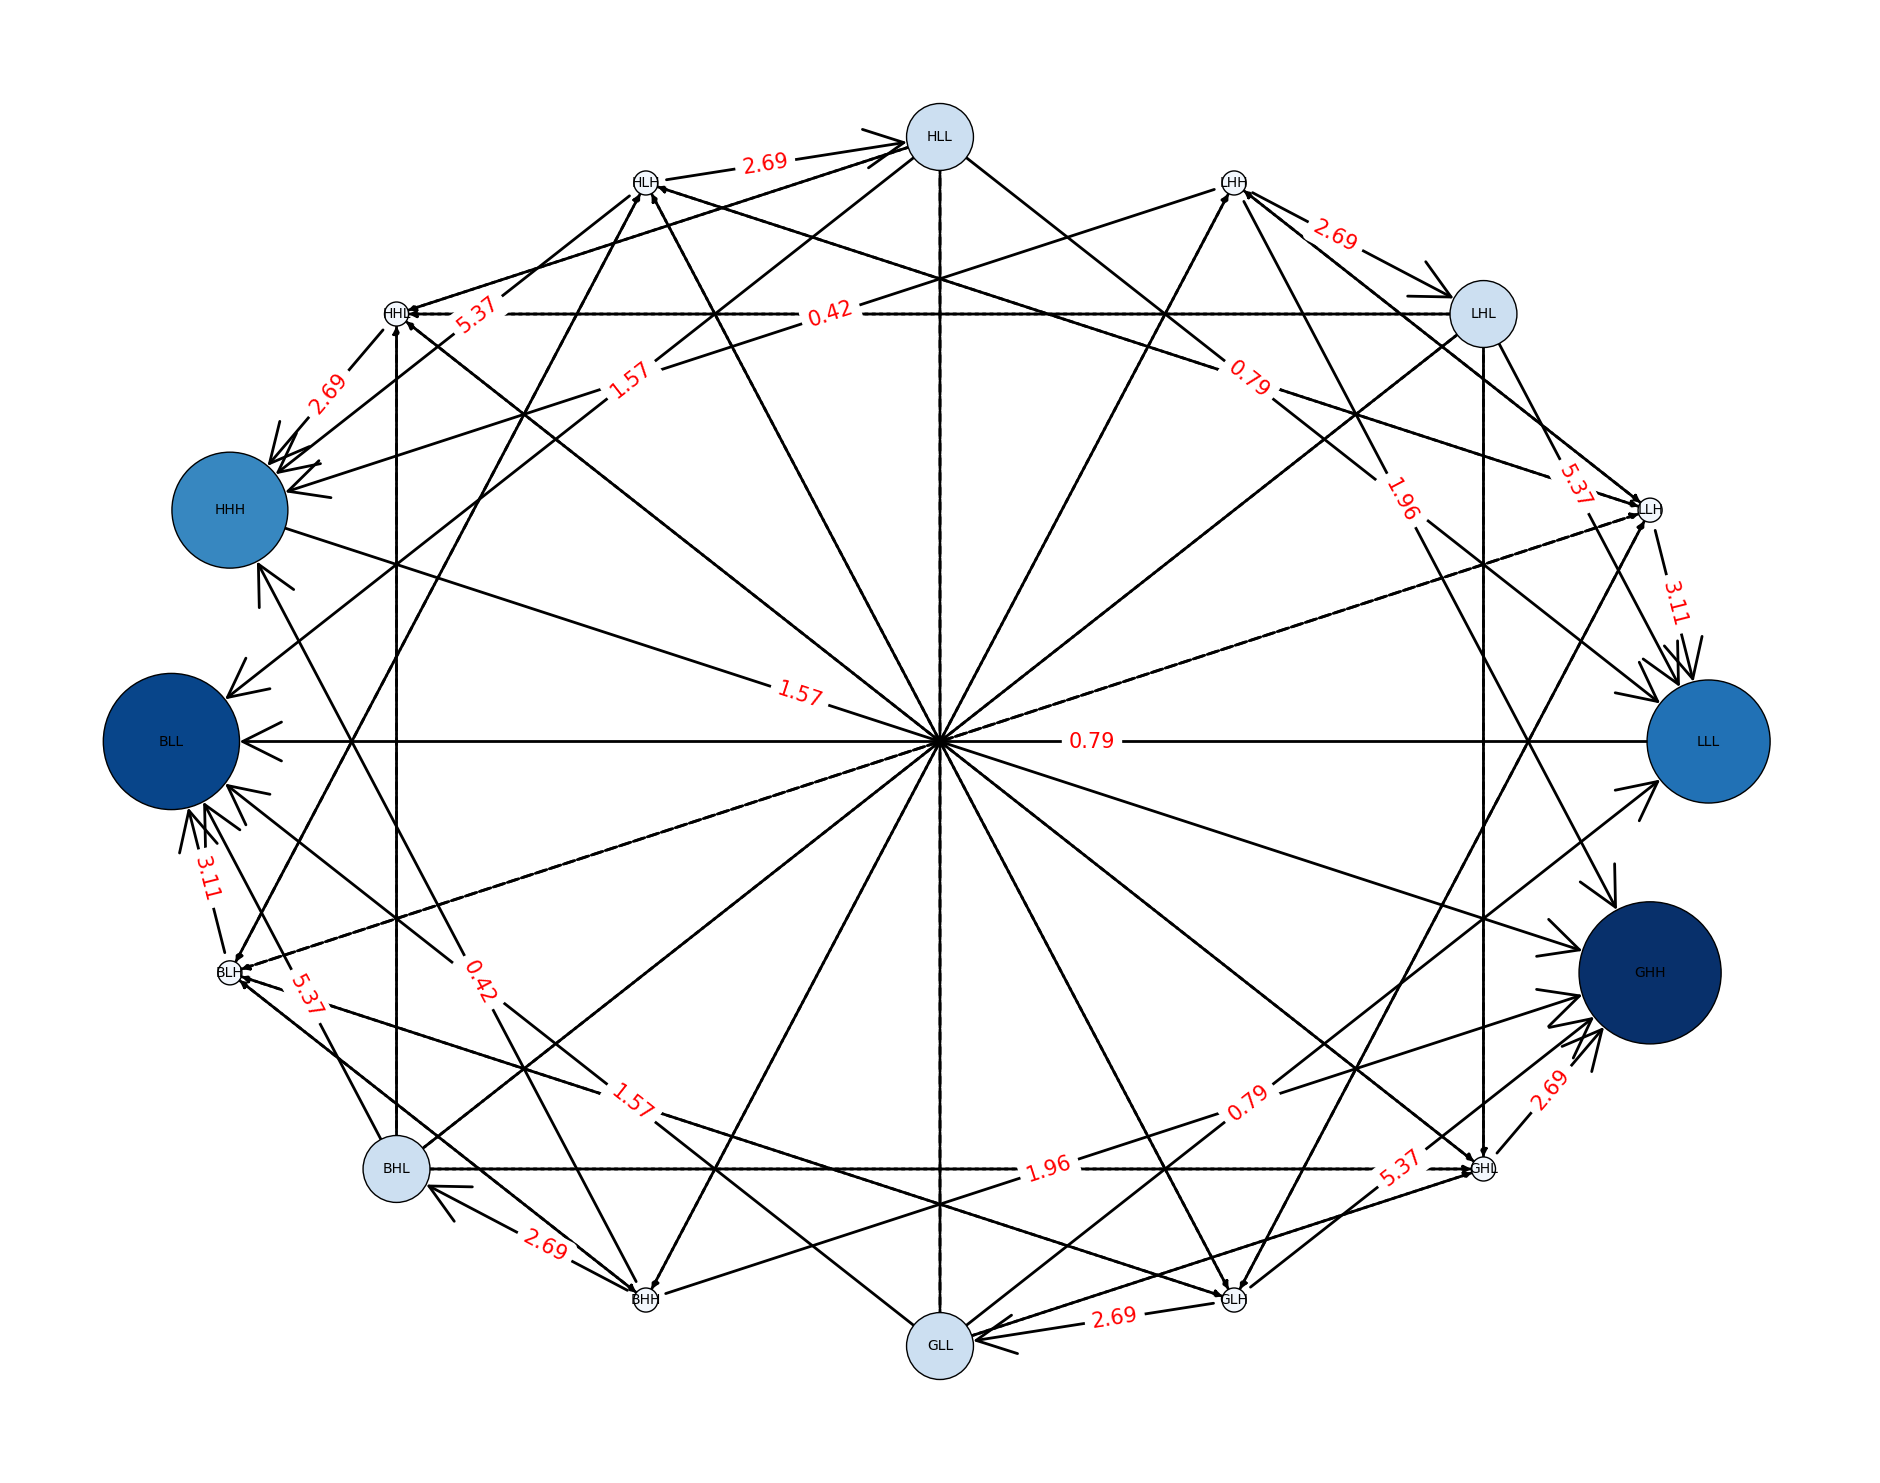

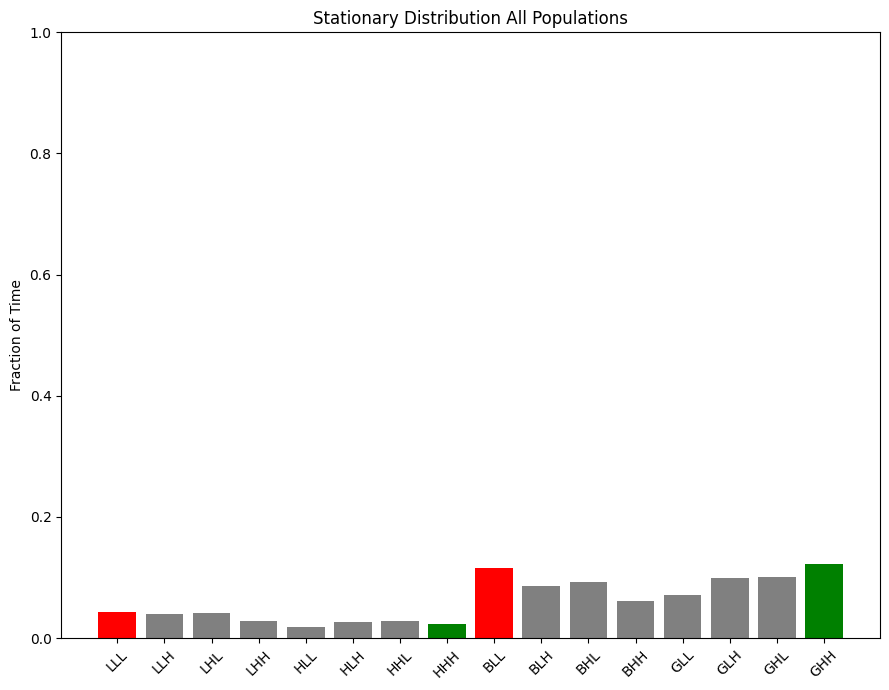

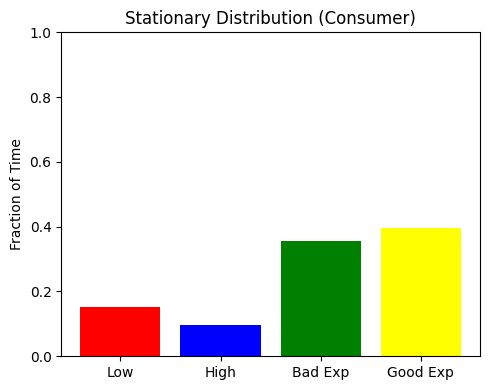

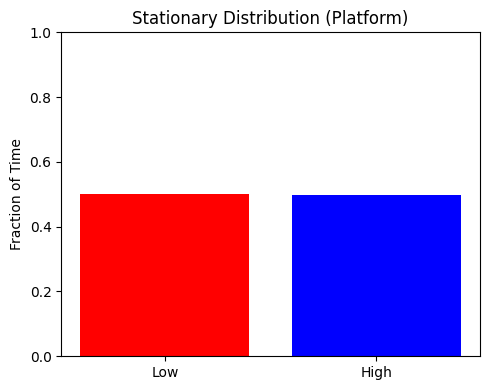

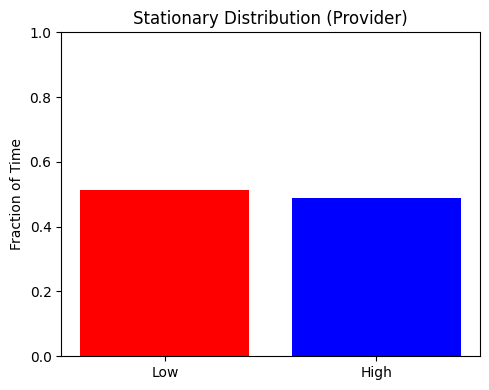

br: 0.4 | (cl, ch): (0.05, 0.15) | (ul, uh): (0.2, 0.4)


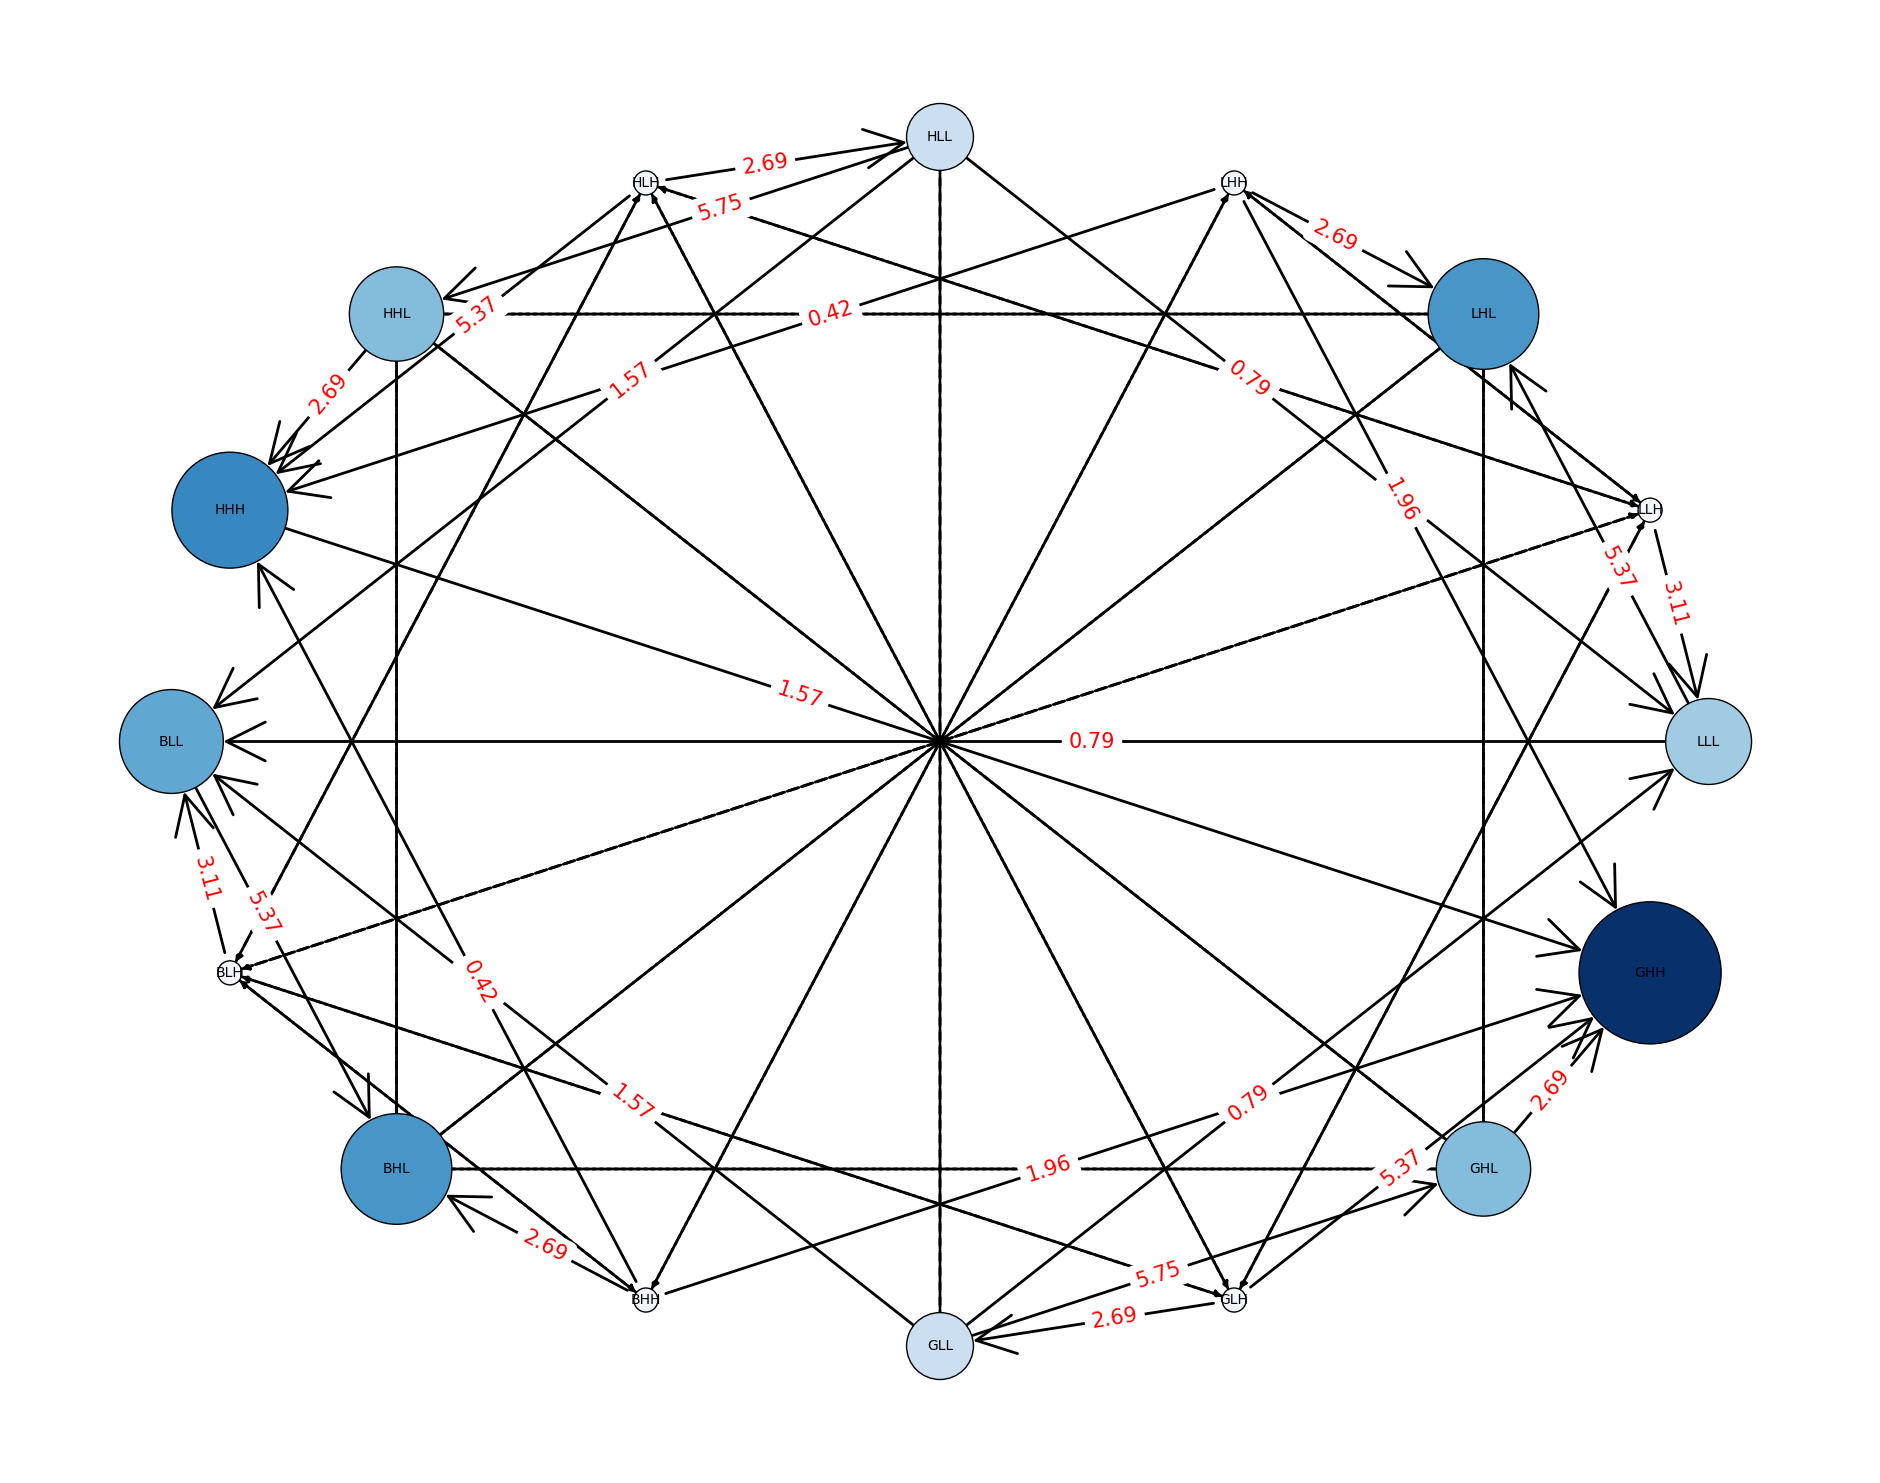

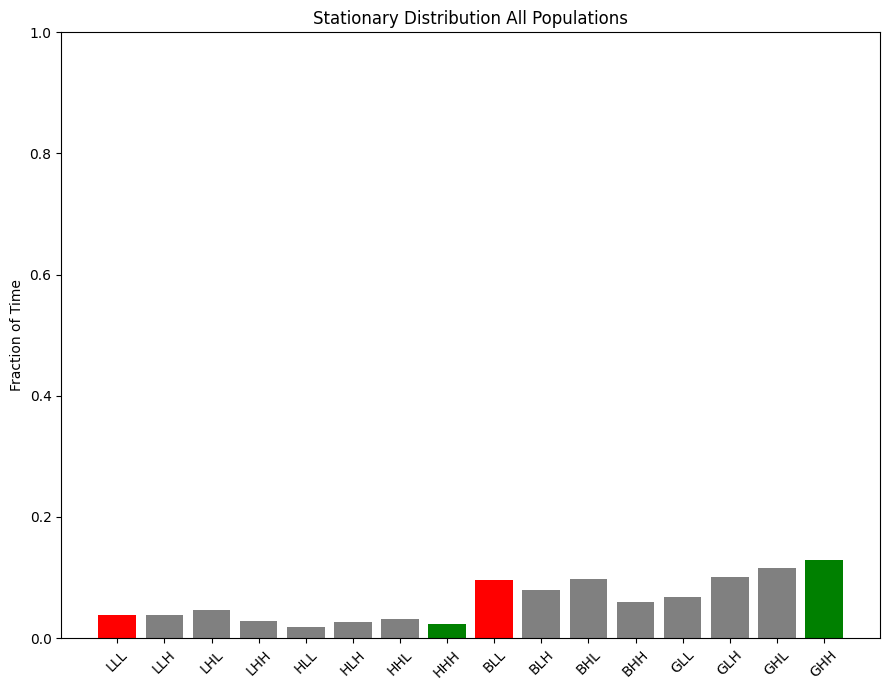

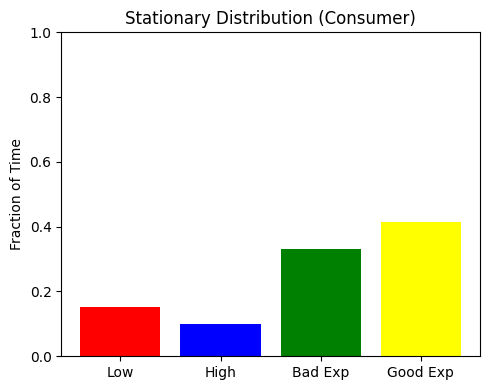

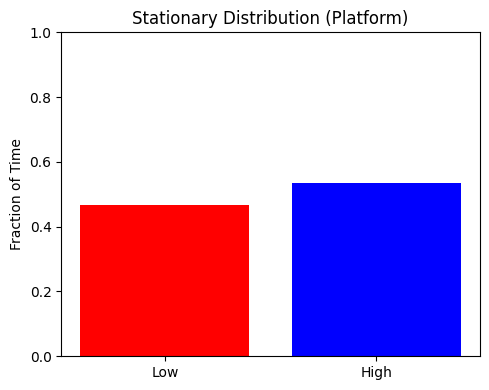

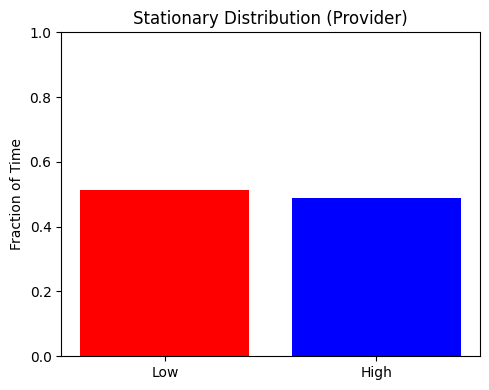

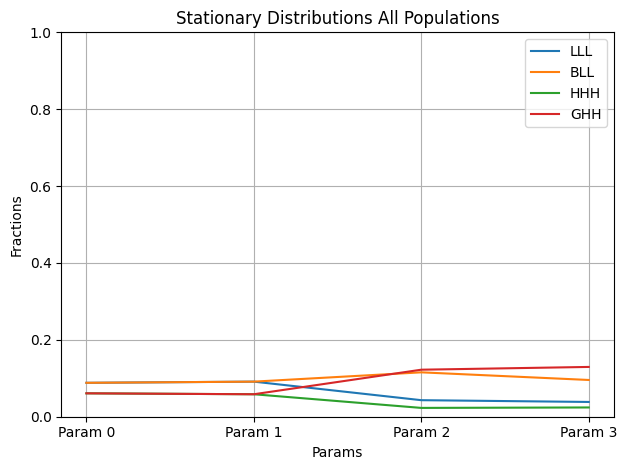

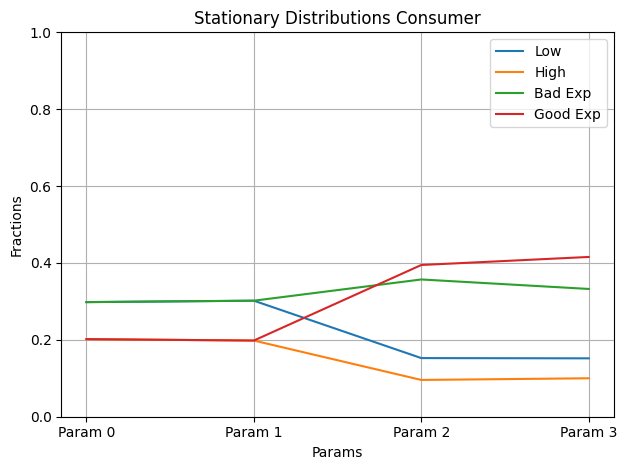

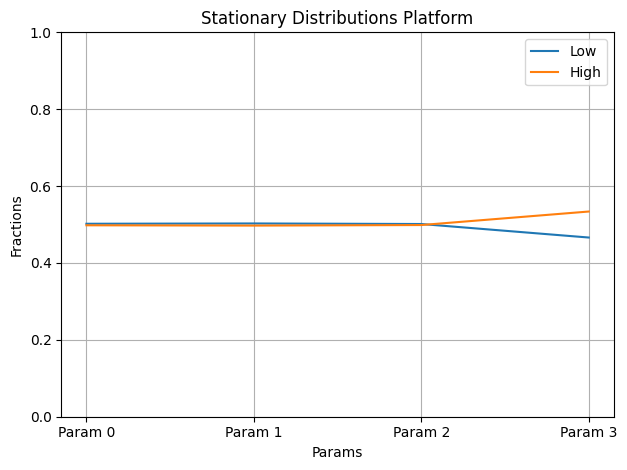

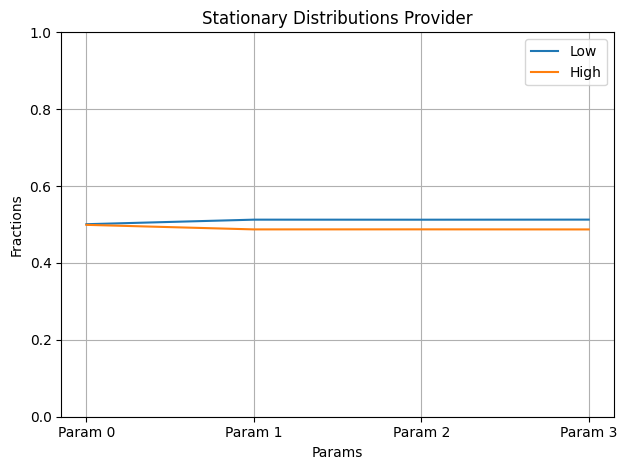

In [5]:
strategies_countss = [[10, 10, 10, 10], [10, 10], [10, 10]]
actions_names = [["Low", "High", "Bad Exp", "Good Exp"], ["Low", "High"], ["Low", "High"]]
actions_symbols = [["L", "H", "B", "G"], ["L", "H"], ["L", "H"]]
players_names = ["Consumer", "Platform", "Provider"]

a = 0.2
rl = 0.2
rh = 0.1
brs = [0.0, 0.0,  0.0,  0.4] 
cls = [0.0, 0.05, 0.05, 0.05] 
chs = [0.0, 0.15, 0.15, 0.15]
uls = [0.0, 0.0,  0.2,  0.2]
uhs = [0.0, 0.0,  0.4,  0.4] 

model_name = "view_countx"
folder = posixpath.join(OUTPUT_PATH, model_name)
stationary_distributions = []

for i, params in enumerate(zip(brs, cls, chs, uls, uhs)):
    br, cl, ch, ul, uh = params
    payoff_view_count = {
        (0, 0, 0): [rl, a-br,  a-cl],  
        (0, 0, 1): [0,  0,  -ch],   
        (0, 1, 0): [0, 0,  -cl],   
        (0, 1, 1): [0,  0,  -ch],   
    
        (1, 0, 0): [0, -br,  -cl],  
        (1, 0, 1): [0, 0,  -ch],   
        (1, 1, 0): [0, 0,  -cl],   
        (1, 1, 1): [rh, a,  a-ch], 
        
        (2, 0, 0): [rl+ul, a-br,  a-cl],  
        (2, 0, 1): [0,  0,  -ch],   
        (2, 1, 0): [0, 0,  -cl],   
        (2, 1, 1): [0,  0,  -ch],   
        
        (3, 0, 0): [0, -br,  -cl],   
        (3, 0, 1): [0, 0,  -ch],   
        (3, 1, 0): [0, 0,  -cl],   
        (3, 1, 1): [rh+uh, a,  a-ch] 
    }

    payoff_matrix = payoff_view_count
    game = EGT.Game(strategies_countss=strategies_countss, payoff_matrix=payoff_matrix, actions_names=actions_names, players_names=players_names)
    print(f"br: {br} | (cl, ch): ({cl}, {ch}) | (ul, uh): ({ul}, {uh})")
    matrix, states = game.compute_trans_matrix(beta=0.08)
    filename_suffix =  f"br({br}) - (cl, ch)({cl}, {ch}) - (ul, uh)({ul}, {uh})_{model_name}.png"
    filepath = posixpath.join(folder, f"trans_matrix {filename_suffix}")
    game.plot_transition_matrix(matrix, states=states, actions_symbols=actions_symbols, scale=150, save_file_name=filepath)
    stationary_distributions.append(game.compute_stationary_distribution(matrix))
    green = [(1,1,1), (3,1,1)]
    red = [(0,0,0), (2,0,0)]

    filepath = posixpath.join(folder, f"stat_distr_all_pop {filename_suffix}")
    game.plot_stationary_distribution_all_pop(stationary_distributions[i], actions_symbols=actions_symbols, states=states, title="Stationary Distribution All Populations", ylabel="Fraction of Time", red=red, green=green, save_file_name=filepath)

    for player in range(len(players_names)):
        filepath = posixpath.join(folder, f"stat_distr_per_pop_{players_names[player]} {filename_suffix}")
        game.plot_stationary_distribution_per_pop(stationary_distributions[i], player=player, actions_symbols=actions_symbols, states=states, title=f"Stationary Distribution ({players_names[player]})", ylabel="Fraction of Time", save_file_name=filepath)



plot_states = [(0,0,0), (2,0,0), (1,1,1), (3,1,1)]
filepath = posixpath.join(folder, f"stat_distrs_all_pop_{model_name}")
game.plot_stationary_distributions_all_pop(stationary_distributions, states, plot_states, actions_symbols, save_file_name=filepath)

for player in range(len(players_names)):
    filepath = posixpath.join(folder, f"stat_distrs_per_pop_{players_names[player]}_{model_name}")
    game.plot_stationary_distributions_per_pop(stationary_distributions, states, actions_symbols, actions_names, players_names=players_names, player=player, save_file_name=filepath)
